**Predicting Heath Status**

using Prescription Data alone. We now ask you to infer a patient’s health status using only their prescription data. You should think of building a model that would allow you to potentially predict the health status of patients outside the ones provided. It is completely up to you how you decide to accomplish this task. Please feel free to make assumptions to solve this and explain those during the interview

In [94]:
#load important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [95]:
patient = pd.read_csv("/content/Prescriptions.csv")

In [96]:
# Lets make a copy of it

patient_status = patient.copy()

In [97]:
patient_status.head()

,Patient_id,Prescription_date,drug_category,drug_group,drug_class
0,P23556,2016-05-08,Estrogens,Estrogens,Estrogens
1,P87538,2016-12-05,Antiparkinson and Related Therapy Agents,Antiparkinson Dopaminergics,Nonergoline Dopamine Receptor Agonists
2,P49608,2018-01-18,Anticoagulants,Direct Factor Xa Inhibitors,Direct Factor Xa Inhibitors
3,P19258,2017-08-07,Endocrine and Metabolic Agents - Misc.,Bone Density Regulators,Bisphosphonates
4,P26638,2018-04-14,Urinary Anti-Infectives,Urinary Anti-Infectives,Urinary Anti-Infectives


In [98]:
#Lets check the data's shape

patient_status.shape

(1024029, 5)

In [99]:
#Lets check the shape of the data

patient_status.shape

(1024029, 5)

In [100]:
# Lets check the unique value in the dataset
for i in patient_status.columns:
    print("~>" + "The number of unique value in {} {}".format(i,len(patient_status[i].unique())))

~>The number of unique value in Patient_id 82546
~>The number of unique value in Prescription_date 1639
~>The number of unique value in drug_category 89
~>The number of unique value in drug_group 415
~>The number of unique value in drug_class 604


The below plot will be helpful in determining the drug type for specific diseases. I have decided to tackle the given problem by checking out the drug category use for what condition or whether that condition is curable or not. But as the unique value of drug category is kind of big so I will check the one which appears maximum times in the data. And some of the drug category curability I can identify myself like Anti-Depressants, Anti-fungals and so on.

<function matplotlib.pyplot.grid>

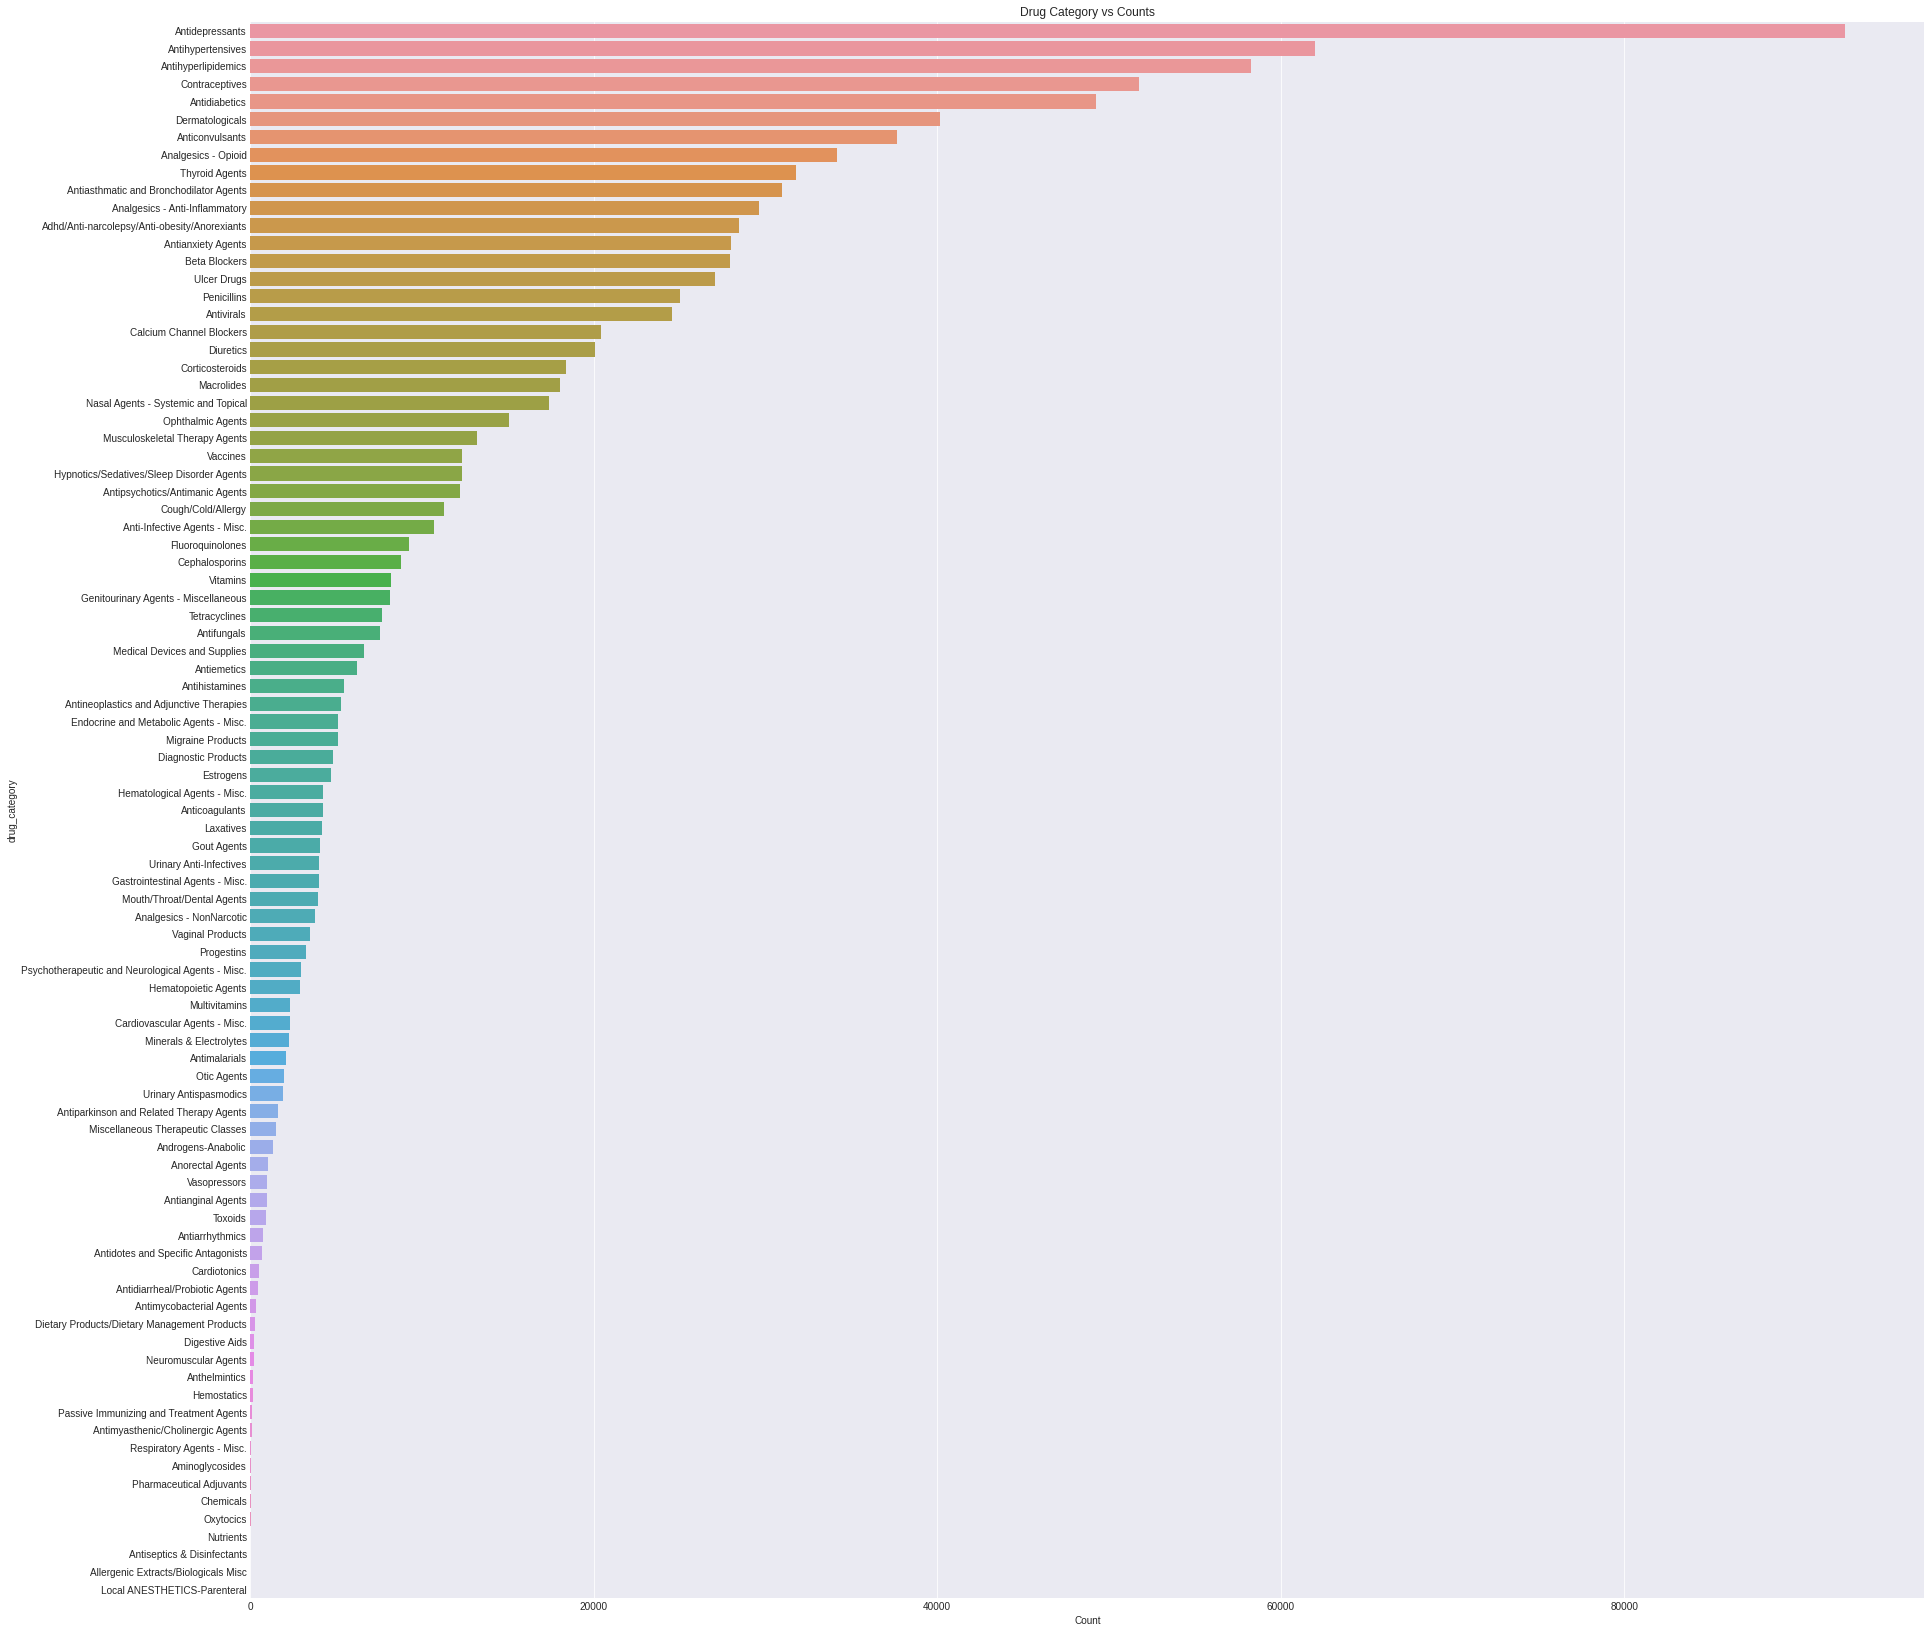

In [101]:
plt.figure(figsize=(30,29))
# plt.style.use('seaborn-darkgrid')
plt.title("Drug Category vs Counts")
# patient_status['drug_category'].value_counts().plot(kind ='pie')
sns.barplot(y=patient_status.drug_category.value_counts().index, x=patient_status.drug_category.value_counts())
plt.xlabel('Count')
plt.ylabel('drug_category')
plt.grid

In [102]:
# Lets check the value counts of drug category  because the above figure kind of hodge podge
patient_status.drug_category.value_counts()

Antidepressants                         92834
Antihypertensives                       62022
Antihyperlipidemics                     58264
Contraceptives                          51732
Antidiabetics                           49251
                                        ...  
Oxytocics                                  13
Nutrients                                   6
Antiseptics & Disinfectants                 2
Allergenic Extracts/Biologicals Misc        2
Local ANESTHETICS-Parenteral                1
Name: drug_category, Length: 89, dtype: int64

In [103]:
# Lets take out the year from the date column, so that later on we will get to know about the number of visit the patient made.

prescription_year =[]
for i in range(len(patient_status)):
    prescription_year.append((patient_status["Prescription_date"].iloc[i].split('-').pop(0)))  

In [104]:
patient_status['Prescription_Year'] = pd.DataFrame(prescription_year)

# Lets drop Patient_id and Prescription_date column

patient_status.drop(['Prescription_date'], axis =1, inplace =True)

In [105]:
# Lets check the unique value in the dataset
for i in patient_status.columns:
    print("~>" + "The number of unique value in {} {}".format(i,len(patient_status[i].unique())))

~>The number of unique value in Patient_id 82546
~>The number of unique value in drug_category 89
~>The number of unique value in drug_group 415
~>The number of unique value in drug_class 604
~>The number of unique value in Prescription_Year 6


In [106]:
patient_status.head()

,Patient_id,drug_category,drug_group,drug_class,Prescription_Year
0,P23556,Estrogens,Estrogens,Estrogens,2016
1,P87538,Antiparkinson and Related Therapy Agents,Antiparkinson Dopaminergics,Nonergoline Dopamine Receptor Agonists,2016
2,P49608,Anticoagulants,Direct Factor Xa Inhibitors,Direct Factor Xa Inhibitors,2018
3,P19258,Endocrine and Metabolic Agents - Misc.,Bone Density Regulators,Bisphosphonates,2017
4,P26638,Urinary Anti-Infectives,Urinary Anti-Infectives,Urinary Anti-Infectives,2018


In [107]:
# Rearrange the columns

cols = ['Patient_id','Prescription_Year','drug_category','drug_group','drug_class']

patient_status = patient_status[cols]
patient_status.shape

(1024029, 5)

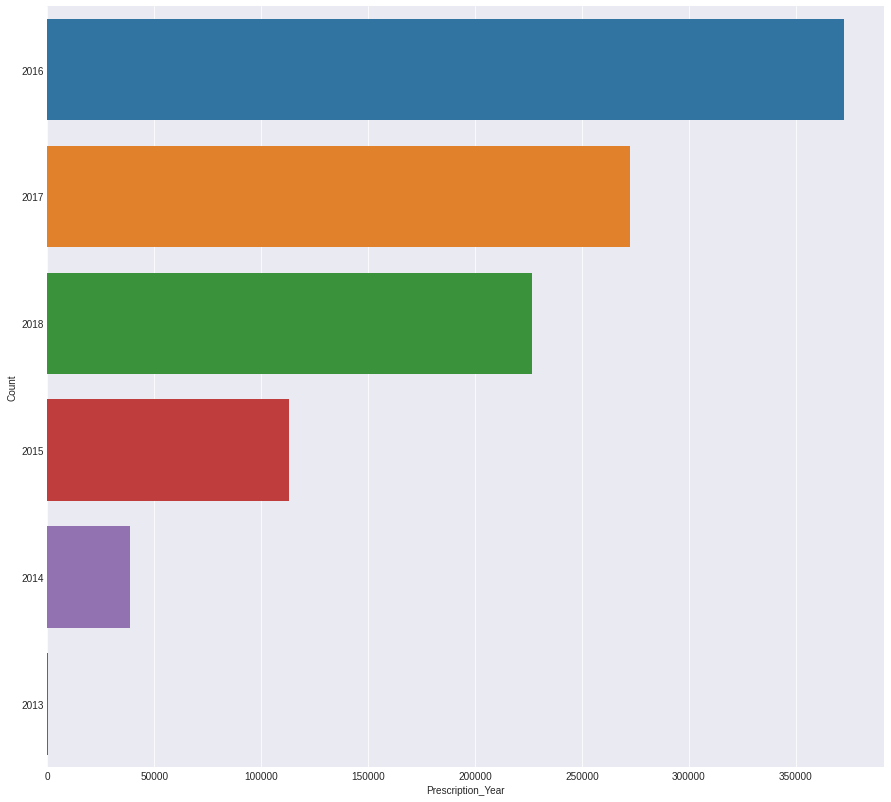

In [108]:
# Lets see the number of patients visits

plt.figure(figsize =(15,14))
plt.style.use('seaborn-darkgrid')
plt.xlabel('Prescription Year')
plt.ylabel('Count')
# patient_status['Prescription_Year'].value_counts().plot(kind = 'bar')
sns.barplot(y=patient_status.Prescription_Year.value_counts().index, x=patient_status.Prescription_Year.value_counts())


**Output Column**

As any patient can consumes more than one medicine, and the medicines that patient consumes may be contain one drug which is used to cure Beta blockers and two other are allergic and cold (I'm not a doctor but its random combination), now the person is cured or not cured, is decided like:


For example :- 

Beta Blockers :- use for heart attack and others as well like heart rhythm. And coronary heart disease cannot be cured. I give that -1.
Allergy and cold  is curable therfore Allergy =1 and cold =1.
so overall -1 + 1 + 1 = 1 which means cured.

*   Simple_Drug (drug category) = 1
*   Drug (non-cured disease) = -1
*   No information(not check the drug category) = 0

For a specific patient, sum of his or her medication combination will tell us his/her health status







In [109]:
# Treatable and curable are two different thing.
# I give Antivirals -1, as I have gone through the data for antivirals
# mannualy I found out that corresponding drug class is Herpes and influenza
# which are not curable, and we are aware of that viral diseases are treatable 
# not curable

Health_Status =[]
for i in range(len(patient_status)):
  if('Vaccines' in patient_status.drug_category.iloc[i].split(',')):
    Health_Status.append(1)
  
  elif('Antidepressants' in patient_status.drug_category.iloc[i].split(',')):
    Health_Status.append(1)
  
  elif('Contraceptives' in patient_status.drug_category.iloc[i].split(',')):
    Health_Status.append(1)
  
  elif('Antidiabetics' in patient_status.drug_category.iloc[i].split(',')):
    Health_Status.append(-1)
  
  elif('Vitamins' in patient_status.drug_category.iloc[i].split(',')):
    Health_Status.append(1)
  
  elif('Antifungals' in patient_status.drug_category.iloc[i].split(',')):
    Health_Status.append(1)
  
  elif('Penicillins' in patient_status.drug_category.iloc[i].split(',')):
    Health_Status.append(1)
  
  elif('Antianxiety Drugs' in patient_status.drug_category.iloc[i].split(',')):
    Health_Status.append(1)
  
  elif('Cough/Cold/Allergy' in patient_status.drug_category.iloc[i].split(',')):
    Health_Status.append(1)
  
  elif('Analgesics - Opioid' in patient_status.drug_category.iloc[i].split(',')):
    Health_Status.append(1)
  
  elif('Nasal Agents - Systemic and Topica' in patient_status.drug_category.iloc[i].split(',')):
    Health_Status.append(1)
  
  elif('Antiparkinson and Related Therapy Agents' in patient_status.drug_category.iloc[i].split(',')):
    Health_Status.append(-1)
    # Parkinson is not curable
  
  elif('Minerals & Electrolytes' in patient_status.drug_category.iloc[i].split(',')):
    Health_Status.append(1)
  
  elif('Laxatives' in patient_status.drug_category.iloc[i].split(',')):
    Health_Status.append(1)
  
  elif('Antihypertensive' in patient_status.drug_category.iloc[i].split(',')):
    Health_Status.append(-1)
    #hypertension is not curable
  
  elif('Estrogen' in patient_status.drug_category.iloc[i].split(',')):
    Health_Status.append(1)
  
  elif('Thyroid Agents' in patient_status.drug_category.iloc[i].split(',')):
    Health_Status.append(1)
  
  elif('Antihistamines' in patient_status.drug_category.iloc[i].split(',')):
    Health_Status.append(-1)
    # Antihistamin :- hay fever or allergy not curable
  
  elif('Adhd/Anti-narcolepsy/Anti-obesity/Anorexiants' in patient_status.drug_category.iloc[i].split(',')):
    Health_Status.append(-1)
    # Narcolepsy is not curable
  
  elif('Beta Blockers' in patient_status.drug_category.iloc[i].split(',')):
    Health_Status.append(-1)
    # Beta-blockers :- cornary diseases which are not curable
  
  elif('Antimalarials' in patient_status.drug_category.iloc[i].split(',')):
    Health_Status.append(1)
  
  elif('Antianginal Agents' in patient_status.drug_category.iloc[i].split(',')):
    Health_Status.append(-1)
    #Aginal is not curable
  
  elif('Dermatologicals' in patient_status.drug_category.iloc[i].split(',')):
    Health_Status.append(-1)
    # Most often dermatological diseases is not curable they are treatable
  
  elif('Diuretics' in patient_status.drug_category.iloc[i].split(',')):
    Health_Status.append(1)
  
  elif('Corticosteroids' in patient_status.drug_category.iloc[i].split(',')):
    Health_Status.append(1)
  
  elif('Multivitamins' in patient_status.drug_category.iloc[i].split(',')):
    Health_Status.append(1)
  
  elif('Tetracyline' in patient_status.drug_category.iloc[i].split(',')):
    Health_Status.append(1)
  
  elif('Gastrointestinal Agents - Misc.' in patient_status.drug_category.iloc[i].split(',')):
    Health_Status.append(1)
  
  elif('Antihyperlipidemics' in patient_status.drug_category.iloc[i].split(',')):
    Health_Status.append(1)
  
  elif('Anticonvulsants' in patient_status.drug_category.iloc[i].split(',')):
    Health_Status.append(-1)
  
  elif('Fluoroquinolones' in patient_status.drug_category.iloc[i].split(',')):
    Health_Status.append(1)
  
  elif('Antiasthmatic and Bronchodilator Agents' in patient_status.drug_category.iloc[i].split(',')):
    Health_Status.append(-1)
  
  elif('Musculoskeletal Therapy Agents' in patient_status.drug_category.iloc[i].split(',')):
    Health_Status.append(1)
  
  elif('Antivirals' in patient_status.drug_category.iloc[i].split(',')):
    Health_Status.append(-1)
  
  elif('Analgesics - Anti-Infammatory' in patient_status.drug_category.iloc[i].split(',')):
    Health_Status.append(1)
  
  elif('Anticogulants' in patient_status.drug_category.iloc[i].split(',')):
    Health_Status.append(1)
  
  elif('Macrolides' in patient_status.drug_category.iloc[i].split(',')):
    Health_Status.append(1)
  
  elif('Endocrine and Metabolic Agents - Misc.' in patient_status.drug_category.iloc[i].split(',')):
    Health_Status.append(1)
  
  elif('Hypnotics/Sedatives/Sleep Disorder Agents' in patient_status.drug_category.iloc[i].split(',')):
    Health_Status.append(1)
  
  elif('Urinary Antispasmodics' in patient_status.drug_category.iloc[i].split(',')):
    Health_Status.append(-1)
    # OAB i.e. Over Active Bladder is not curable
  
  elif('Urinary Anti-Infectives' in patient_status.drug_category.iloc[i].split(',')):
    Health_Status.append(1)
  
  else:
    Health_Status.append(0)
  

In [110]:
patient_status['Health_Status'] = pd.DataFrame(Health_Status)

patient_group = patient_status[['Patient_id','Health_Status']]

patient_group_1 = patient_group.groupby(['Patient_id']).sum().reset_index()

health =[]

for i in range(len(patient_group_1)):
    if (patient_group_1.Health_Status.iloc[i] > 0):
    health.append(1)    # 1 -- cured
    elif (patient_group_1.Health_Status.iloc[i] < 0):
    health.append(2)    # 2 not cured
    else:
    health.append(0)    # 0 not decided; suggestion to see the drug 

In [111]:
patient_group_1['Health'] = pd.DataFrame(health)
patient_group_1.head()

,Patient_id,Health_Status,Health
0,P00001,-1,2
1,P00002,2,1
2,P00003,1,1
3,P00004,2,1
4,P00005,-2,2


In [112]:
patient_group_1.Health.value_counts()

1    52043
2    18855
0    11648
Name: Health, dtype: int64

In [113]:
# Lets perform groupby operation 

patient_details = patient_status.groupby(["Patient_id"]).agg(Visits=('Prescription_Year',lambda x:",".join(x)),Drugs =('drug_category',lambda x:",".join(x))).reset_index()

In [114]:
patient_details['Health'] = pd.DataFrame(health)
patient_details.head()

,Patient_id,Visits,Drugs,Health
0,P00001,2016,Antivirals,2
1,P00002,"2015,2015,2015,2015","Vaccines,Vaccines,Tetracyclines,Analgesics - A...",1
2,P00003,2017,Corticosteroids,1
3,P00004,"2018,2018","Vaccines,Vaccines",1
4,P00005,"2018,2018,2018","Anticonvulsants,Anticonvulsants,Migraine Products",2


Encoding

In [115]:
#1) Visits --> I will replace it with number of times the patient paid visit to the hosipital

dict_visits = {}
for i in range(len(patient_details)):
    dict_visits[patient_details.Visits.iloc[i]] = len(patient_details.Visits.iloc[i].split(","))

patient_details['Visits'].replace(dict_visits, inplace =True)

In [116]:
#2) Drugs column --> Frequency Encoding

fq = patient_details.groupby('Drugs').size()/len(patient_details)

patient_details.loc[:,"{}_freq".format("Drugs")] = patient_details["Drugs"].map(fq)

patient_details.drop("Drugs",axis =1, inplace =True)

In [117]:
# Rearrange the columns

cols = ['Patient_id', 'Visits', 'Drugs_freq','Health']
patient_details = patient_details[cols]

In [118]:
patient_details.head()

,Patient_id,Visits,Drugs_freq,Health
0,P00001,1,0.008710,2
1,P00002,4,0.000012,1
2,P00003,1,0.003319,1
3,P00004,2,0.001672,1
4,P00005,3,0.000024,2


In [119]:
# As every patient has unique id and it does not influence Health of an individual
# Drop this column. Before dropping it, lets make a copy.

health_status =patient_details.copy()

health_status.drop("Patient_id", axis =1, inplace =True)

In [120]:
health_status.head()

,Visits,Drugs_freq,Health
0,1,0.008710,2
1,4,0.000012,1
2,1,0.003319,1
3,2,0.001672,1
4,3,0.000024,2


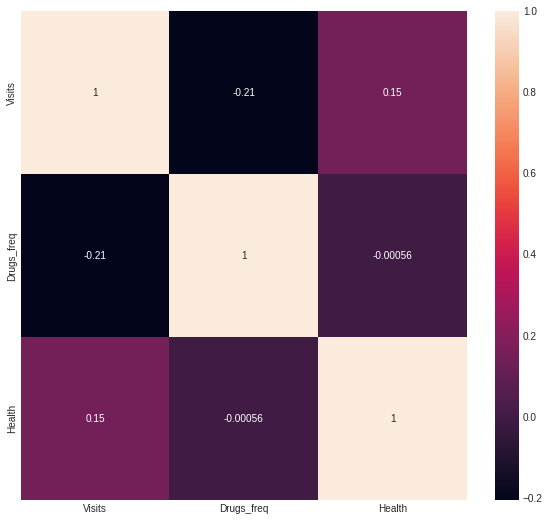

In [121]:
# Lets check the correlation 

health_corr = health_status.corr()
plt.figure(figsize = (10,9))
sns.heatmap(health_corr, annot = True)

Model

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,classification_report,confusion_matrix
import xgboost

In [123]:
# Lets see the value counts of 0,1,2

patient_details.Health.value_counts()

1    52043
2    18855
0    11648
Name: Health, dtype: int64

In [124]:
# As the data is biased, therefore, now it becomes imbalance dataset problem
# Input-Output Data
X = health_status.drop("Health", axis =1)
y = health_status["Health"]

from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_sm,y_sm = smote.fit_resample(X,y)


In [125]:
print(X_sm.shape, y_sm.shape)
y_sm.value_counts()

(156129, 2) (156129,)


2    52043
1    52043
0    52043
Name: Health, dtype: int64

In [126]:
# Split the data
X_train,X_test, y_train, y_test = train_test_split(X_sm,y_sm, test_size = 0.24, random_state = 42)

In [127]:
# Feature Scaling
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.fit_transform(X_test)

Evaluation Parameter :-                 

I have decided to take only confusion matrix as my evaluation paramtere. 

What specifically I will see in the matrix is that 

> non-cured (Actual) ---> cured (model prediction)

I have choosen this because according to the output column I have generated it has 3 values i.e.

*   1 --> Cured
*   2 --> Non-Cured
*   0 --> Neutral (i.e. No idea)

for "0" I put few suggestions i.e.
1.   additional diagonsis
2.   check the drug category

Further I will explain in my Report












Random Forest

In [128]:
clf = RandomForestClassifier(n_estimators = 500, criterion = 'gini', random_state =22)
clf.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=500, random_state=22)

In [129]:
y_pred = clf.predict(X_test_scaled)

Text(72.5, 0.5, 'Truth')

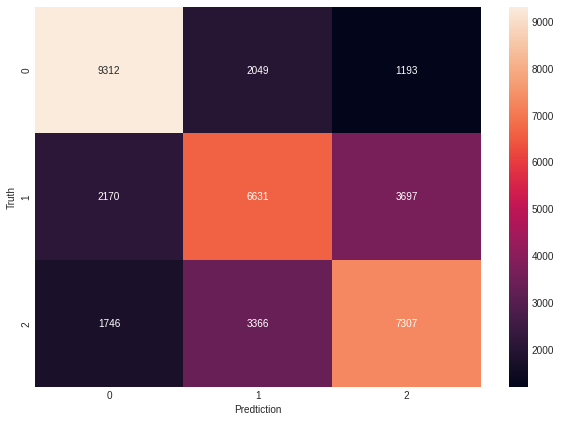

In [130]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot =True, fmt ='d')
plt.xlabel('Predtiction')
plt.ylabel('Truth')

In [131]:
clf_1 = RandomForestClassifier(n_estimators = 1000,criterion = 'entropy', random_state =30)
clf_1.fit(X_train_scaled, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=30)

Text(72.5, 0.5, 'Truth')

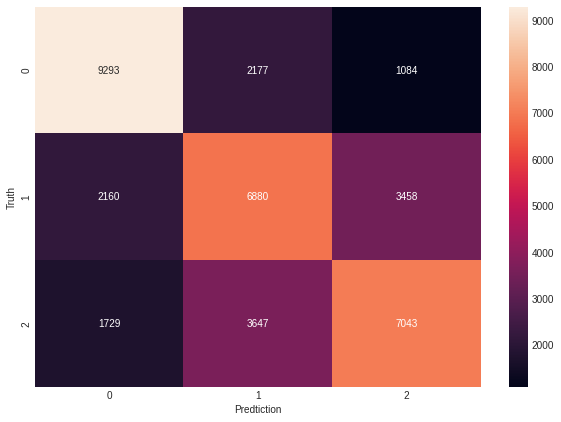

In [132]:
y_pred1 = clf_1.predict(X_test_scaled)
cm = confusion_matrix(y_test,y_pred1)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot =True, fmt ='d')
plt.xlabel('Predtiction')
plt.ylabel('Truth')

In [133]:
# further increase in n_estimators does not have any influence on our evaluate metrics
# it is still 574 or 573 and we can add 3303 + 7061 becasue if the  patient output comes zero
# either that patient will again go through diagnosis or we will identify his/her diseases by his/her
# drug category. So that person health status always be clear.

clf_2 = RandomForestClassifier(n_estimators = 200,criterion = 'entropy', random_state =50)
clf_2.fit(X_train_scaled, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=50)

Text(72.5, 0.5, 'Truth')

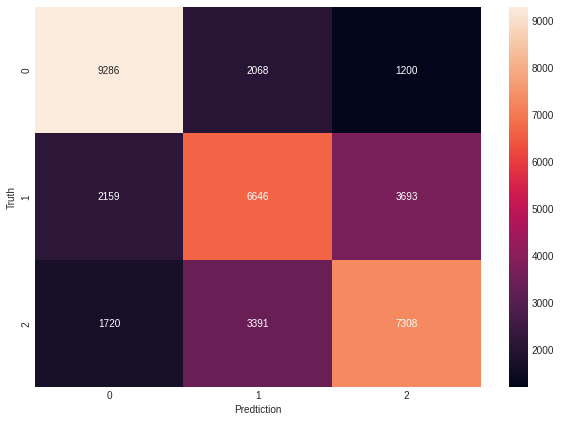

In [134]:
y_pred2 = clf_2.predict(X_test_scaled)
cm = confusion_matrix(y_test,y_pred2)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot =True, fmt ='d')
plt.xlabel('Predtiction')
plt.ylabel('Truth')

Boosting

In [135]:
import xgboost as xgb 
clf_xgb = xgb.XGBClassifier(n_estimators = 250, max_depth = 6, learning_rate = 0.02, colsample_bytree=0.8, subsample = 0.8, random_state =17)
clf_xgb.fit(X_train_scaled,y_train)

XGBClassifier(colsample_bytree=0.8, learning_rate=0.02, max_depth=6,
              n_estimators=250, objective='multi:softprob', random_state=17,
              subsample=0.8)

Text(72.5, 0.5, 'Truth')

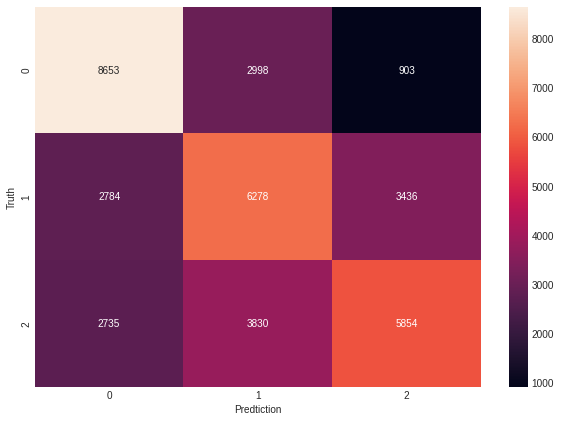

In [136]:
y_pred_xgb = clf_xgb.predict(X_test_scaled)
cm = confusion_matrix(y_test,y_pred_xgb)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot =True, fmt ='d')
plt.xlabel('Predtiction')
plt.ylabel('Truth')

In [139]:
clf_xgb_1 = xgb.XGBClassifier(n_estimators = 1000,random_state = 24)
clf_xgb_1.fit(X_train_scaled,y_train)

XGBClassifier(n_estimators=1000, objective='multi:softprob', random_state=24)

Text(0.5, 45.5, 'Predtiction')

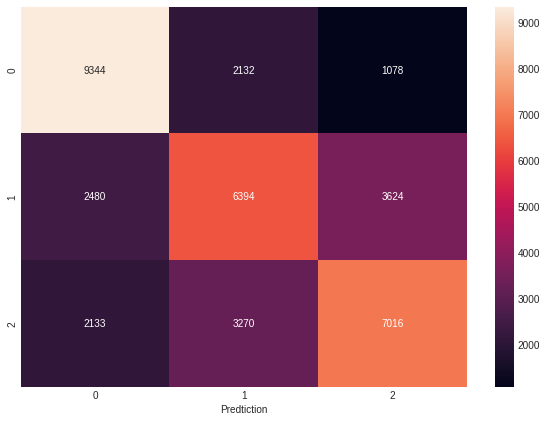

In [140]:
y_pred_xgb_1 = clf_xgb_1.predict(X_test_scaled)
cm = confusion_matrix(y_test,y_pred_xgb_1)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot =True, fmt ='d')
plt.xlabel('Predtiction')

The model that I would go with is clf_xgb i.e.

* clf_xgb_1 = xgb.XGBClassifier(n_estimators = 1000, rando_state =24)

After playing  with parameters I came up with this model. And this model non-cured to cured is 3270 which is less than RandomForest model alongside its non-cured to non-cured and non-cured to neutral is comparable to Random Forest.